## Data Science Challenge 1: Regression

There is a target variable in the dataset regression.zip called Price. Please create a model that predicts Price given a set of observed regressors.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('../assets/challenge1.csv')
df.head()

,loc1,loc2,para1,dow,para2,para3,para4,price
0,0,01,1,Mon,662,3000.0,3.8,73.49
1,9,99,1,Thu,340,2760.0,9.2,300.00
2,0,04,0,Mon,16,2700.0,3.0,130.00
3,4,40,1,Mon,17,12320.0,6.4,365.00
4,5,50,1,Thu,610,2117.0,10.8,357.50


In [3]:
df.describe()

,para1,para2,para3,para4,price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.380800,447.384000,9547.989920,8.459522,433.733056
std,3.500831,221.005861,8022.814037,4.613526,277.435947
min,0.000000,16.000000,200.000000,1.000000,50.730000
25%,1.000000,301.000000,2898.000000,4.000000,250.000000
50%,1.000000,434.000000,6447.000000,7.200000,370.000000
75%,1.000000,582.000000,15000.000000,13.600000,550.000000
max,337.000000,2554.000000,34782.000000,27.200000,5700.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
loc1     10000 non-null object
loc2     10000 non-null object
para1    10000 non-null int64
dow      10000 non-null object
para2    10000 non-null int64
para3    10000 non-null float64
para4    10000 non-null float64
price    10000 non-null float64
dtypes: float64(3), int64(2), object(3)
memory usage: 625.1+ KB


#### Brief first look at our data:
* We have 10,000 entries to work with
    * No missing values for any columns
* para1 - para4 and price are numeric
    * what does para stand for?
* loc1 and loc2 are objects even though they look numeric, see if there's some weird entries (not that we necessarily want to interpret them numerically)
    * does loc stand for location or something else?
* dow stands for day of week

In [5]:
col_l = []
for i in df.columns:
    a = np.unique(df[i], return_counts=True)
    print('------------')
    print(i,a[0],a[1],sep='\n')
    col_l.append(a)
col_l = np.array(col_l)

------------
loc1
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'S' 'T']
[1486 1223 1607  945  773  846  620 1081  727  690    1    1]
------------
loc2
['00' '01' '02' '03' '04' '05' '06' '07' '08' '09' '0B' '0C' '0L' '0N' '0T'
 '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '20' '21' '22' '23' '24'
 '25' '26' '27' '28' '29' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39'
 '40' '41' '42' '43' '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54'
 '55' '56' '57' '58' '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69'
 '70' '71' '72' '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84'
 '85' '86' '87' '88' '89' '90' '91' '92' '93' '94' '95' '96' '97' '98' '99'
 'S6' 'TS']
[  1 241  63 100 180  38 454  75 137 192   1   1   1   1   1  39   2 273
 128 246 168 166  28  24 149 168 499 226 215  79  74  43  95 149  59 118
 160  87  82  53 118  43  76  62 146 101 111  91   1  43  48  42 139  70
 127 217 108  49  43  50  61  44  75  57 142  31  10   5 119  59  34  68
 167 112  15  45

In [6]:
for i,j in zip(col_l,df.columns):
    print('number of unique values for {}:'.format(j),len(i[0]))
    m = np.argmax(i[1])
    print('most common value is: {}'.format(i[0][m]))
    print('which appears {} times'.format(i[1][m]))
    print('--------------------------------------------')

number of unique values for loc1: 12
most common value is: 2
which appears 1607 times
--------------------------------------------
number of unique values for loc2: 107
most common value is: 21
which appears 499 times
--------------------------------------------
number of unique values for para1: 13
most common value is: 1
which appears 7052 times
--------------------------------------------
number of unique values for dow: 7
most common value is: Wed
which appears 2233 times
--------------------------------------------
number of unique values for para2: 1016
most common value is: 16
which appears 93 times
--------------------------------------------
number of unique values for para3: 4359
most common value is: 24000.0
which appears 493 times
--------------------------------------------
number of unique values for para4: 243
most common value is: 13.6
which appears 3306 times
--------------------------------------------
number of unique values for price: 932
most common value is: 400.0

### Unique Values Commentary:
#### Loc
* loc1
    * values of 0-9, S and T
    * S and T both only appear once. Remove?
* loc2
    * all double digits. 
    * first character: 0-9, S or T
    * second character: 0-9, B, C, L, N, T, S
    * as with loc1, the values containing letters appear only once each
    
#### Para
* para1
    * takes on values of 0-9, 13,24,337
    * heavily slanted towards smaller values - especially 1, 70% of values
* para2
    * far more values - not much else to say at this point
* para3
    * again, far more values
* para4
    * a decimal, different than the others. Not sure what to make of it yet
    * between 0 and 27.2
    
#### Day of Week
   * Saturday and Sunday appear very infrequently, 10 and 3 respectively. 
   * should I get rid of them?
   
#### Price
   * $50.73 - 5700

In [7]:
# Looking at outliers for loc1
    # - might be that loc2 contains loc1, need to keep an eye on it
df.iloc[[np.where(df.loc1 == i)[0][0] for i in ['S','T']]]

,loc1,loc2,para1,dow,para2,para3,para4,price
3026,S,S6,3,Fri,1289,24000.0,13.6,850.0
5510,T,TS,3,Fri,1472,1600.0,2.0,440.0


In [8]:
# Looking at outliers for loc2

a = ['0B','0C','0L','0N','0T','S6','TS'] 
df.iloc[[np.where(df.loc2 == i)[0][0] for i in a]]

,loc1,loc2,para1,dow,para2,para3,para4,price
2887,0,0B,2,Mon,801,1091.0,9.0,1350.0
7751,0,0C,3,Fri,623,1500.0,6.0,400.0
5647,0,0L,2,Wed,1127,10000.0,13.6,750.0
8466,0,0N,3,Fri,1298,3500.0,2.1,1500.0
4850,0,0T,2,Mon,1473,4000.0,2.0,1890.0
3026,S,S6,3,Fri,1289,24000.0,13.6,850.0
5510,T,TS,3,Fri,1472,1600.0,2.0,440.0


In [9]:
# Looking at outliers for para1
df.iloc[np.where(df.para1 > 8)[0]]

,loc1,loc2,para1,dow,para2,para3,para4,price
1561,0,06,24,Fri,314,3360.0,13.6,450.0
4522,2,24,13,Fri,363,7920.0,13.2,490.0
5928,2,24,9,Tue,413,7260.0,13.6,530.0
7196,6,63,337,Mon,442,25000.0,13.6,1150.0
7198,2,24,9,Wed,583,6600.0,12.0,730.0
8328,5,50,13,Fri,292,2528.0,6.8,350.0


In [10]:
# Looking at Sundays
df.iloc[np.where(df.dow == 'Sun')[0]]

,loc1,loc2,para1,dow,para2,para3,para4,price
3359,8,89,1,Sun,386,14524.0,8.0,500.0
7507,0,01,1,Sun,461,5000.0,7.0,650.0
7534,8,86,1,Sun,234,20000.0,13.6,350.0


In [11]:
# Looking at Saturdays
df.iloc[np.where(df.dow == 'Sat')[0]]

,loc1,loc2,para1,dow,para2,para3,para4,price
46,7,73,2,Sat,523,1025.0,7.0,300.0
897,1,12,2,Sat,543,20000.0,13.6,950.0
3723,1,19,2,Sat,471,5000.0,13.6,500.0
3883,2,21,2,Sat,461,3027.0,8.8,600.0
4675,8,89,2,Sat,685,2096.0,7.0,187.5
5904,5,57,2,Sat,545,10350.0,13.6,850.0
6462,6,68,2,Sat,20,15960.0,13.6,850.0
6476,1,14,2,Sat,554,15000.0,13.6,820.0
7748,9,90,2,Sat,449,10000.0,6.8,380.0
8966,1,16,2,Sat,17,720.0,14.4,200.0


para1 is 1 for all Sundays, and 2 for all Saturdays. 
Not sure what it means

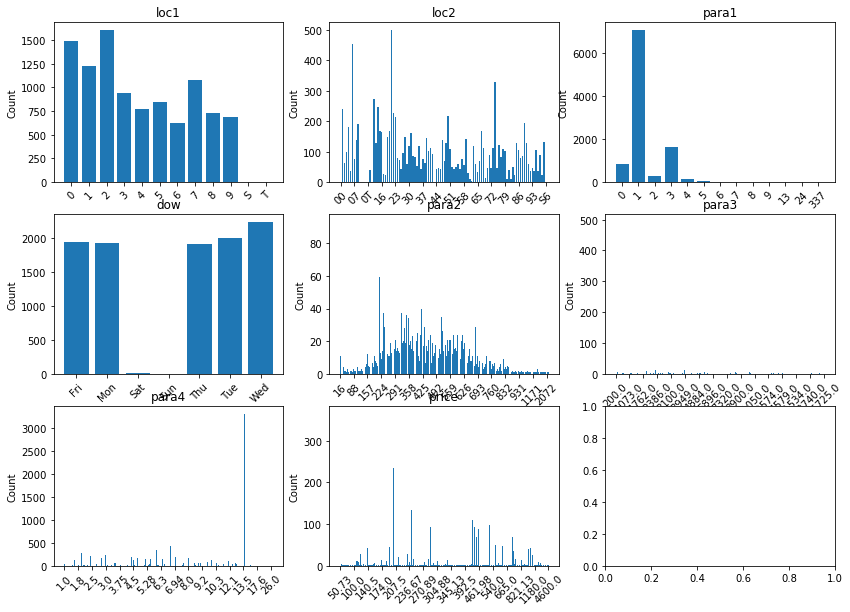

In [13]:
fig, axs = plt.subplots(3, 3, figsize=(14, 10))
axs = axs.ravel()
for ax, c,t in zip(axs,col_l,df.columns):
    labels = np.array(c[0])
    ind = np.arange(len(labels))
    ax.bar(ind,c[1])
    ax.set_title(t)
    ax.set_ylabel('Count')
    if len(ind)>15:
        ind = np.arange(len(labels),step=len(labels)//15)     
    ax.set_xticks(ind)
    xtickNames = ax.set_xticklabels(labels[ind])
    plt.setp(xtickNames, rotation=45, fontsize=10)

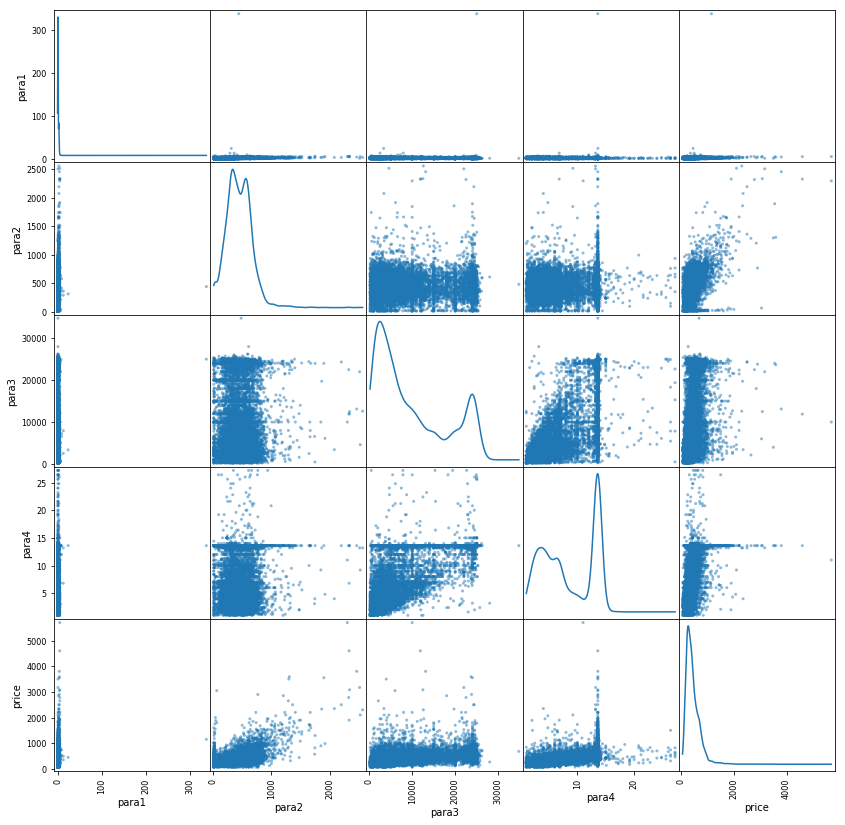

In [14]:
a = pd.plotting.scatter_matrix(df, figsize=(14, 14), diagonal='kde')

#### So: what does this tell us?
* We know that loc1 and loc2 both have entries that contain letters, so they can't be interpreted as being numerical

In [15]:
sum([i == j[0] for i,j in zip(df.loc1,df.loc2)])

10000

This is telling us that the first character of loc2 is ALWAYS loc1, so let's make a new column containing only the second character.

In [16]:
df['loc2'] = [i[1] for i in df.loc2]
df.head()

,loc1,loc2,para1,dow,para2,para3,para4,price
0,0,1,1,Mon,662,3000.0,3.8,73.49
1,9,9,1,Thu,340,2760.0,9.2,300.00
2,0,4,0,Mon,16,2700.0,3.0,130.00
3,4,0,1,Mon,17,12320.0,6.4,365.00
4,5,0,1,Thu,610,2117.0,10.8,357.50


In [17]:
len(np.where(df.loc1 == df.loc2)[0])

784

Let's hide the rows where loc1 or loc2 are letters (only 8 entries), so we can see if there's any relationships that pop out

In [18]:
loc_nondigits = ['B','C','L','N','T','S']
a = [np.where(df.loc2 == i)[0][0] for i in ['B','C','L','N','T','S']]
a = a + [np.where(df.loc1 == i)[0][0] for i in ['S','T']]
df.iloc[a]
# Not sure - I'm going to drop them for now. I can come back later puzzle over it
df = df.drop(a)

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

y = df.pop('price').values
X = df.values
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [137]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error,explained_variance_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import PredefinedSplit, GridSearchCV
from sklearn.pipeline import Pipeline
import re

In [117]:
# This loads our dataframe and calls the other functions down below
def load_df(adj_loc=True,rm_out=False,dow_cat=False,onehot=False):
    df = pd.read_csv('../assets/challenge1.csv')
    if adj_loc == True: df = adjust_loc(df)
    if rm_out == True: df = remove_outliers(df)
    if dow_cat == True: df = dow_to_cat(df)
    if onehot == True: df = one_hot(df)
    return df

In [89]:
# removes the locations that contain an letter in them - they make up 
# an insignificant proportion of the data, and I'm going to see what 
# happens when we treat it as a numeric value (think it's categorical,
# based on the name, but no reason to assume)
def adjust_loc(df):
    df['loc2'] = [i[1] for i in df.loc2]
    a = [np.where(df.loc2 == i)[0][0] for i in ['B','C','L','N','T','S']]
    a = a + [np.where(df.loc1 == i)[0][0] for i in ['S','T']]
    df = df.drop(a)
    return df

In [90]:
# removes the 13 values for day of the week that occur on a weekend.
# Even if I wanted to do a 'is_weekend' column, that's not enough
# datapoints to justify it
def remove_outliers(df):
    df = df.drop(df.index[np.where(df.dow == 'Sun')[0]])
    df = df.drop(df.index[np.where(df.dow == 'Sat')[0]])
    return df

In [91]:
# converts dow into something the OneHotEncoder can deal with. 
def dow_to_cat(df):
    d = {'Sun':0,'Mon':1,'Tue':2,'Wed':3,'Thu':4,'Fri':5,'Sat':6}
    df['dow'] = [d[i] for i in df.dow]
    return df

In [92]:
# takes the day-of-week column and creates a new column for every weekday,
# with one in that column indicating that it's that day. 
def one_hot(df):
    new_enc = OneHotEncoder()
    a = new_enc.fit_transform(df.dow.values.reshape(-1,1)).toarray()
    for v,i in enumerate(['mon','tue','wed','thu','fri']):
        df[i] = a[:,v]
    del df['dow']
    return df

In [179]:
class filterRows():
    def fit(self,X,y):
        return self
    def transform(self, X):
        X = adjust_loc(X)
        X = remove_outliers(X)
        return X

In [180]:
class typeHandler():
    def fit(self,X,y):
        return self
    def transform(self,X):
        X['loc1'] = [int(i) for i in X.loc1]
        X['loc2'] = [int(i) for i in X.loc2]
        return X

In [181]:
class myOneHot():
    def fit(self,X,y):
        return self
    def transform(self,X):
        X = dow_to_cat(X)
        X = one_hot(X)
        return X

In [182]:
p = Pipeline([
    ('filter', filterRows()),
    ('type_handler', typeHandler()),
    ('encoder', myOneHot()),
    ('lm', LinearRegression())
])

In [ ]:
params = {}

In [132]:
def run_linreg(df,scale=False,norm=False):
    y = df.pop('price').values
    X = df.values
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    if scale == True:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    if norm == True: lin_reg = LinearRegression(normalize=True)
    else: lin_reg = LinearRegression()
    lin_reg.fit(X_train,y_train)
    pred = lin_reg.predict(X_test)
    print('R^2 Score is:',lin_reg.score(X_test,y_test))
    print('Mean Squared Error is:',mean_squared_error(y_test,pred))
    print('Explained Variance Score is:',explained_variance_score(y_test,pred))

In [121]:
df = load_df()
y = df.pop('price').values
df.pop('dow')
X = df.values
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [122]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [123]:
pred = lin_reg.predict(X_test)
print('R^2 Score is:',lin_reg.score(X_test,y_test))
print('Mean Squared Error is:',mean_squared_error(y_test,pred))
print('Explained Variance Score is:',explained_variance_score(y_test,pred))
# Not horrible, actually. I've been really worried about time, but this simple model is not bad. 

R^2 Score is: 0.541375050793
Mean Squared Error is: 27067.7446692
Explained Variance Score is: 0.542493436233


### Checkpoint

I have the very most basic possible model. Things to do next:
* One hot encoding for day of the week
* see what one hot encoding the locations does for me
* grid search to find the best parameters
* experiment with other models 

In [197]:
# I can pass this a model and it will run it. 
def run_lin_model(df,reg,scale=False):
    y = df.pop('price').values
    X = df.values
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    if scale == True:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    reg.fit(X_train,y_train)
    pred = reg.predict(X_test)
    print('R^2 Score is:',reg.score(X_test,y_test))
    print('Mean Squared Error is:',mean_squared_error(y_test,pred))
    print('Explained Variance Score is:',explained_variance_score(y_test,pred))
    return reg

In [128]:
df = load_df()
df.pop('dow')
run_linreg(df,scale=True)

R^2 Score is: 0.564300359097
Mean Squared Error is: 38291.9902151
Explained Variance Score is: 0.564852951781


/Users/tc/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Slightly better! Let's see how much better we can do!

In [129]:
df = load_df(adj_loc=True,rm_out=True,dow_cat=True)
run_linreg(df,scale=True)

R^2 Score is: 0.562121033533
Mean Squared Error is: 36914.422743
Explained Variance Score is: 0.562339803827


/Users/tc/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [195]:
df = load_df(adj_loc=True,rm_out=True,dow_cat=True,onehot=True)
run_linreg(df,scale=True)

R^2 Score is: 0.357978850854
Mean Squared Error is: 51751.8619475
Explained Variance Score is: 0.357997674143


/Users/tc/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


It looks like the one hot encoding made things worse - which is honestly not that surprising. We're increasing the dimensionality of the data, and we still haven't added any regularization.

In [136]:
df = load_df(adj_loc=True,rm_out=True,dow_cat=True)
run_linreg(df,scale=True,norm=True)

R^2 Score is: 0.421891322054
Mean Squared Error is: 47308.907816
Explained Variance Score is: 0.42198510091


/Users/tc/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


We need something we can play around with more - the default linear model doesn't give us as much control as we'd like. 

In [141]:
df = load_df(adj_loc=True,rm_out=True,dow_cat=True,onehot=False)
reg = linear_model.LinearRegression()
run_lin_model(df,reg)

R^2 Score is: 0.552065617425
Mean Squared Error is: 37246.2480046
Explained Variance Score is: 0.552440827219


In [142]:
df = load_df(adj_loc=True,rm_out=True,dow_cat=True,onehot=False)
reg = linear_model.LinearRegression()
run_lin_model(df,reg,scale=True)

R^2 Score is: 0.365842467386
Mean Squared Error is: 53201.3394291
Explained Variance Score is: 0.365853573201


/Users/tc/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [143]:
df = load_df(adj_loc=True,rm_out=True,dow_cat=True,onehot=False)
reg = linear_model.Ridge (alpha = .5)
run_lin_model(df,reg)

R^2 Score is: 0.566705832582
Mean Squared Error is: 28371.337858
Explained Variance Score is: 0.567024718087


In [144]:
df = load_df(adj_loc=True,rm_out=True,dow_cat=True,onehot=False)
reg = linear_model.Ridge (alpha = .5)
run_lin_model(df,reg,scale=True)

R^2 Score is: 0.613161618653
Mean Squared Error is: 33427.810407
Explained Variance Score is: 0.613161825453


/Users/tc/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Now we're getting somewhere!

In [145]:
df = load_df(adj_loc=True,rm_out=True,dow_cat=True,onehot=True)
reg = linear_model.Ridge (alpha = .5)
run_lin_model(df,reg,scale=True)

R^2 Score is: 0.548026281445
Mean Squared Error is: 41275.9490278
Explained Variance Score is: 0.548078558334


/Users/tc/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [161]:
df = load_df(adj_loc=True,rm_out=True,dow_cat=True,onehot=True)
reg = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0])
run_lin_model(df,reg,scale=True)
reg, reg.alpha_

R^2 Score is: 0.601612276728
Mean Squared Error is: 27561.45002
Explained Variance Score is: 0.602150671184


/Users/tc/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(RidgeCV(alphas=[0.1, 1.0, 10.0], cv=None, fit_intercept=True, gcv_mode=None,
     normalize=False, scoring=None, store_cv_values=False), 10.0)

In [166]:
df = load_df(adj_loc=True,rm_out=True,dow_cat=True,onehot=True)
reg = linear_model.RidgeCV(alphas=[5.0,10.0,15])
run_lin_model(df,reg,scale=True)
reg, reg.alpha_

R^2 Score is: 0.557804026958
Mean Squared Error is: 42065.6500957
Explained Variance Score is: 0.558334575037


/Users/tc/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(RidgeCV(alphas=[5.0, 10.0, 15], cv=None, fit_intercept=True, gcv_mode=None,
     normalize=False, scoring=None, store_cv_values=False), 15.0)

In [167]:
reg = linear_model.Lasso(alpha = 0.1)
df = load_df(adj_loc=True,rm_out=True,dow_cat=True,onehot=True)
run_lin_model(df,reg,scale=True)

R^2 Score is: 0.574703800282
Mean Squared Error is: 30532.7509005
Explained Variance Score is: 0.574747494963


/Users/tc/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [171]:
reg = linear_model.LassoCV(alphas = [0.1,.5,1.,10.,100.])
df = load_df(adj_loc=True,rm_out=True,dow_cat=True,onehot=True)
run_lin_model(df,reg,scale=True)
reg, reg.alpha_

R^2 Score is: 0.283359353857
Mean Squared Error is: 56123.443934
Explained Variance Score is: 0.28351034172


/Users/tc/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(LassoCV(alphas=[0.1, 0.5, 1.0, 10.0, 100.0], copy_X=True, cv=None, eps=0.001,
     fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
     normalize=False, positive=False, precompute='auto', random_state=None,
     selection='cyclic', tol=0.0001, verbose=False), 1.0)

In [172]:
reg = linear_model.LassoCV(alphas = [.5,1.,2.5,5.,7.5])
df = load_df(adj_loc=True,rm_out=True,dow_cat=True,onehot=True)
run_lin_model(df,reg,scale=True)
reg, reg.alpha_

R^2 Score is: 0.560965567779
Mean Squared Error is: 33717.863467
Explained Variance Score is: 0.561019616699


/Users/tc/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(LassoCV(alphas=[0.5, 1.0, 2.5, 5.0, 7.5], copy_X=True, cv=None, eps=0.001,
     fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
     normalize=False, positive=False, precompute='auto', random_state=None,
     selection='cyclic', tol=0.0001, verbose=False), 5.0)

In [173]:
reg = linear_model.LassoCV(alphas = [3.5,4.,4.5,5.,5.5,6.])
df = load_df(adj_loc=True,rm_out=True,dow_cat=True,onehot=True)
run_lin_model(df,reg,scale=True)
reg, reg.alpha_

R^2 Score is: 0.587797918876
Mean Squared Error is: 27009.1056183
Explained Variance Score is: 0.588616121069


/Users/tc/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(LassoCV(alphas=[3.5, 4.0, 4.5, 5.0, 5.5, 6.0], copy_X=True, cv=None,
     eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
     normalize=False, positive=False, precompute='auto', random_state=None,
     selection='cyclic', tol=0.0001, verbose=False), 4.0)

In [176]:
reg = linear_model.LassoCV(alphas = [3.5,3.75,4.,4.25,4.5,4.75])
df = load_df(adj_loc=True,rm_out=True,dow_cat=True,onehot=True)
run_lin_model(df,reg,scale=True)
reg, reg.alpha_

R^2 Score is: 0.558880824073
Mean Squared Error is: 38002.9730687
Explained Variance Score is: 0.559121404078


/Users/tc/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(LassoCV(alphas=[3.5, 3.75, 4.0, 4.25, 4.5, 4.75], copy_X=True, cv=None,
     eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
     normalize=False, positive=False, precompute='auto', random_state=None,
     selection='cyclic', tol=0.0001, verbose=False), 3.5)

In [198]:
reg = linear_model.ElasticNet()
df = load_df(adj_loc=True,rm_out=True,dow_cat=True,onehot=True)
run_lin_model(df,reg,scale=True)

R^2 Score is: 0.499413267603
Mean Squared Error is: 46980.5042383
Explained Variance Score is: 0.499544300879


/Users/tc/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [200]:
reg = linear_model.ElasticNetCV(alphas=[.1,.25,.5,1.,2.5,5.,10.,100.])
df = load_df(adj_loc=True,rm_out=True,dow_cat=True,onehot=True)
run_lin_model(df,reg,scale=True)
reg,reg.alpha_

R^2 Score is: 0.530798767396
Mean Squared Error is: 41162.5141987
Explained Variance Score is: 0.530798822821


/Users/tc/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(ElasticNetCV(alphas=[0.1, 0.25, 0.5, 1.0, 2.5, 5.0, 10.0, 100.0], copy_X=True,
        cv=None, eps=0.001, fit_intercept=True, l1_ratio=0.5, max_iter=1000,
        n_alphas=100, n_jobs=1, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic',
        tol=0.0001, verbose=0), 0.25)

In [202]:
reg = linear_model.ElasticNetCV(alphas=[.2,.25,.3,.35,.4,.45,5.])
df = load_df(adj_loc=True,rm_out=True,dow_cat=True,onehot=True)
run_lin_model(df,reg,scale=True)
reg,reg.alpha_

R^2 Score is: 0.570379490394
Mean Squared Error is: 30420.5478111
Explained Variance Score is: 0.570792045238


/Users/tc/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(ElasticNetCV(alphas=[0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 5.0], copy_X=True,
        cv=None, eps=0.001, fit_intercept=True, l1_ratio=0.5, max_iter=1000,
        n_alphas=100, n_jobs=1, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic',
        tol=0.0001, verbose=0), 0.20000000000000001)

In [203]:
reg = linear_model.ElasticNetCV(alphas=[.15,.17,.19,.2,.22,.24,.26,.28,.3])
df = load_df(adj_loc=True,rm_out=True,dow_cat=True,onehot=True)
run_lin_model(df,reg,scale=True)
reg,reg.alpha_

R^2 Score is: 0.540600480893
Mean Squared Error is: 28711.1848016
Explained Variance Score is: 0.540848416289


/Users/tc/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(ElasticNetCV(alphas=[0.15, 0.17, 0.19, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3],
        copy_X=True, cv=None, eps=0.001, fit_intercept=True, l1_ratio=0.5,
        max_iter=1000, n_alphas=100, n_jobs=1, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=0), 0.20000000000000001)

In [204]:
reg = linear_model.BayesianRidge()
df = load_df(adj_loc=True,rm_out=True,dow_cat=True,onehot=True)
run_lin_model(df,reg,scale=True)
reg

R^2 Score is: 0.541398416879
Mean Squared Error is: 41581.690262
Explained Variance Score is: 0.541728075318


/Users/tc/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [205]:
reg = linear_model.ARDRegression()
df = load_df(adj_loc=True,rm_out=True,dow_cat=True,onehot=True)
run_lin_model(df,reg,scale=True)
reg

/Users/tc/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


R^2 Score is: 0.37628931104
Mean Squared Error is: 60980.9613573
Explained Variance Score is: 0.377156344515


ARDRegression(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, threshold_lambda=10000.0, tol=0.001, verbose=False)

In [210]:
reg = linear_model.SGDRegressor()
df = load_df(adj_loc=True,rm_out=True,dow_cat=True,onehot=True)
run_lin_model(df,reg,scale=False)
reg

R^2 Score is: -8.07848363007e+28
Mean Squared Error is: 5.76499438805e+33
Explained Variance Score is: -3.22463590544e+28


/Users/tc/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [211]:
from sklearn import svm
reg = svm.LinearSVR()
df = load_df(adj_loc=True,rm_out=True,dow_cat=True,onehot=True)
run_lin_model(df,reg,scale=False)
reg

R^2 Score is: -10.132634493
Mean Squared Error is: 795684.377699
Explained Variance Score is: -3.75710398985


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [213]:
reg = svm.LinearSVR()
df = load_df(adj_loc=True,rm_out=True,dow_cat=True,onehot=True)
run_lin_model(df,reg,scale=False)
reg

R^2 Score is: 0.344108814114
Mean Squared Error is: 47700.9524258
Explained Variance Score is: 0.462105028007


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

There are some pretty big numbers, RMSLE might be more appropriate than RMSE

In [185]:
df=load_df()
df.head()

,loc1,loc2,para1,dow,para2,para3,para4,price
0,0,1,1,Mon,662,3000.0,3.8,73.49
1,9,9,1,Thu,340,2760.0,9.2,300.00
2,0,4,0,Mon,16,2700.0,3.0,130.00
3,4,0,1,Mon,17,12320.0,6.4,365.00
4,5,0,1,Thu,610,2117.0,10.8,357.50


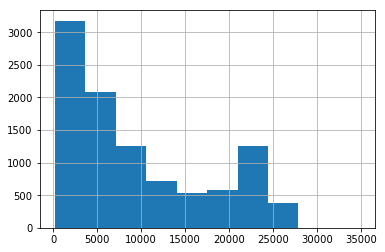

In [191]:
df.para3.hist()